# Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7067,7181-OQCUT,Male,0,No,No,21,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,103.85,2215,No
7068,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
7069,9373-WSLOY,Male,1,Yes,No,33,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.00,1750.85,No
7070,8957-THMOA,Female,0,No,Yes,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.15,970.85,No
7071,7776-QGYJC,Female,0,Yes,Yes,39,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),81.50,3107.3,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7072 non-null   object 
 1   gender            7072 non-null   object 
 2   SeniorCitizen     7072 non-null   int64  
 3   Partner           7072 non-null   object 
 4   Dependents        7072 non-null   object 
 5   tenure            7072 non-null   int64  
 6   PhoneService      7072 non-null   object 
 7   MultipleLines     7072 non-null   object 
 8   InternetService   7072 non-null   object 
 9   OnlineSecurity    7055 non-null   object 
 10  OnlineBackup      7072 non-null   object 
 11  DeviceProtection  7072 non-null   object 
 12  TechSupport       7072 non-null   object 
 13  StreamingTV       7072 non-null   object 
 14  StreamingMovies   7072 non-null   object 
 15  Contract          7072 non-null   object 
 16  PaperlessBilling  7072 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7072.00000,7072.000000,7072.000000
mean,0.16233,32.361001,65.508976
std,0.36878,24.562353,33.760897
min,0.00000,0.000000,18.250000
25%,0.00000,9.000000,35.650000
50%,0.00000,29.000000,70.350000
75%,0.00000,55.000000,89.900000
max,1.00000,72.000000,430.038097


# Missing data

In [6]:
# Checking for missing data
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      17
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [7]:
# Checking column 'OnlineSecurity' as it shows 17 counts in isnull
data['OnlineSecurity']

0                        No
1                       Yes
2                       Yes
3                       Yes
4                        No
               ...         
7067                    Yes
7068    No internet service
7069                     No
7070    No internet service
7071                     No
Name: OnlineSecurity, Length: 7072, dtype: object

In [8]:
data['OnlineSecurity'].value_counts()

No                     3507
Yes                    2023
No internet service    1525
Name: OnlineSecurity, dtype: int64

##### Column OnlineSecurity is a categorical data and 50% of the people have No as the categorical value so replacing missing values with No. Using the mode of the column for data imputation.

In [9]:
data['OnlineSecurity'] = data['OnlineSecurity'].fillna(data['OnlineSecurity'].mode()[0])

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We have no more missing values!

# Checking for duplicate entries in data

In [11]:
data.duplicated().value_counts()

False    7043
True       29
dtype: int64

##### We have found some duplicate rows in the data so removing these rows by drop_duplicate()

In [12]:
# Removing the duplicate rows
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().value_counts()

False    7043
dtype: int64

In [14]:
data.duplicated().value_counts()

False    7043
dtype: int64

##### All duplicate rows removed!

# Changing Datatype of columns 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# Currently datatype of column totalcharges is of the 'object' datatype 
# Changing it to float
data['TotalCharges'] = data['TotalCharges'].astype('float64')
data.info()

ValueError: could not convert string to float: ''

#### This means we have some erroneous entries in totalcharges that are of string type instead numeric
#### Fixing that

# Fixing inconsistencies in data

In [17]:
data['TotalCharges'].map(type).value_counts()

<class 'str'>    7043
Name: TotalCharges, dtype: int64

In [18]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce', downcast='float')


In [19]:
data['TotalCharges'].map(type).value_counts()

<class 'float'>    7043
Name: TotalCharges, dtype: int64

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


# Outlier removal

In [21]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


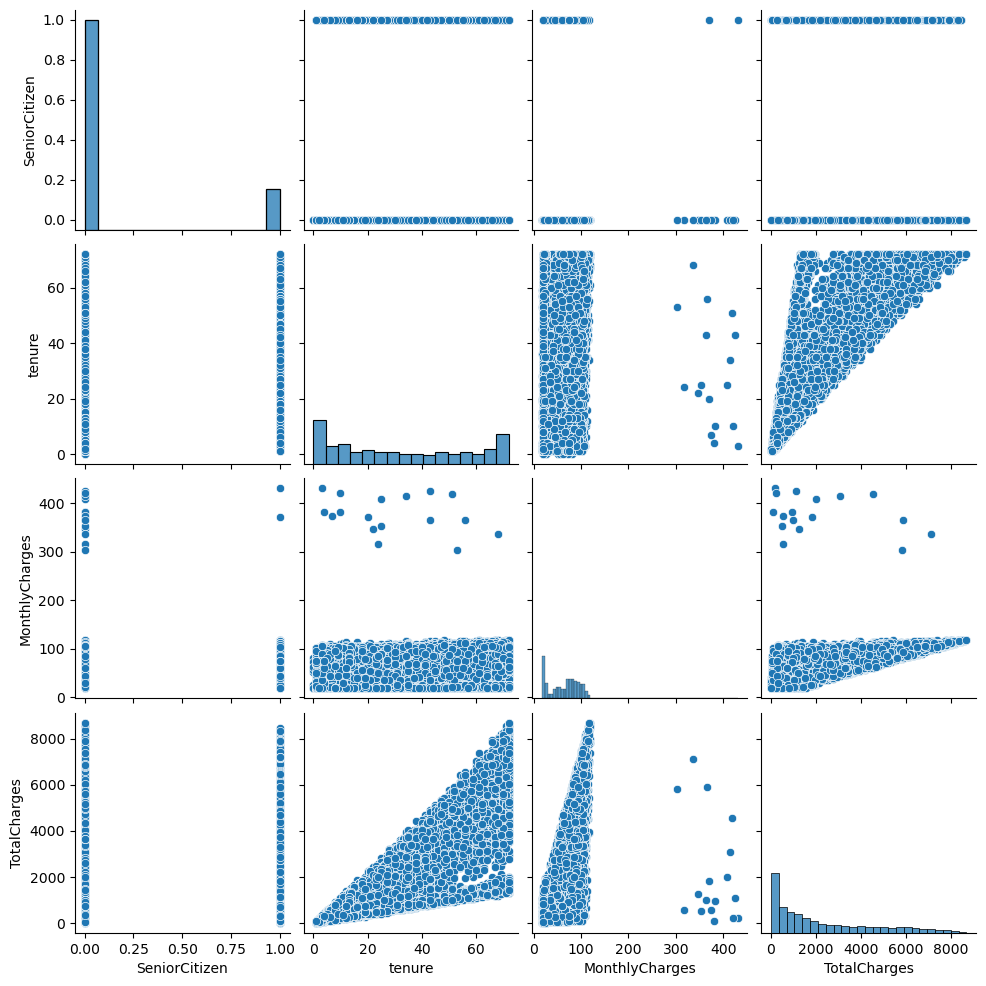

In [23]:
sns.pairplot(data=data)

In [27]:
# We have observed outliers in 
# tenure vs monthly charges
# montlycharges vs total charges

In [28]:
# Montlycharges seems to be contributing to the outlier entries
# all entries with monthly charges above 300 are outliers
# so removing all such entries
max_value = data['MonthlyCharges'].max()
outliers = data['MonthlyCharges'].between(300, max_value)
data = data[~outliers]
data.dropna(axis = 0, inplace=True)
data.isnull().sum()
# data = data[~outliers]
# data.reset_index(drop=True, inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

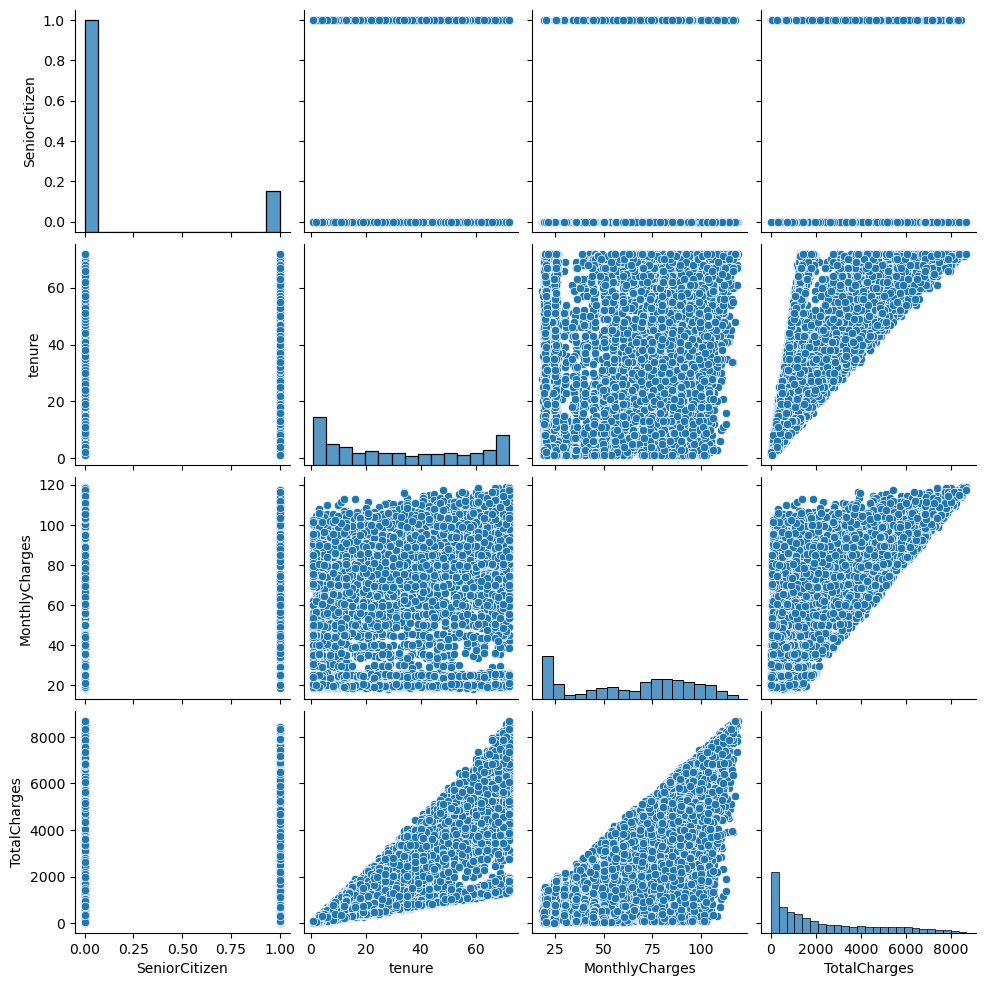

In [29]:
sns.pairplot(data=data)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7015 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7015 non-null   object 
 1   gender            7015 non-null   object 
 2   SeniorCitizen     7015 non-null   int64  
 3   Partner           7015 non-null   object 
 4   Dependents        7015 non-null   object 
 5   tenure            7015 non-null   int64  
 6   PhoneService      7015 non-null   object 
 7   MultipleLines     7015 non-null   object 
 8   InternetService   7015 non-null   object 
 9   OnlineSecurity    7015 non-null   object 
 10  OnlineBackup      7015 non-null   object 
 11  DeviceProtection  7015 non-null   object 
 12  TechSupport       7015 non-null   object 
 13  StreamingTV       7015 non-null   object 
 14  StreamingMovies   7015 non-null   object 
 15  Contract          7015 non-null   object 
 16  PaperlessBilling  7015 non-null   object 


In [31]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
# outliers removed!

# Addressing Inconsistencies in Categorical Data: Category Merge

##### There are multiple columns that have redundant category names which can be merged into one. This will reduce the complexity of the data to some extent.

In [33]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


#### Column "MultipleLines" Category Merge

In [34]:
column = 'MultipleLines'
data[column].value_counts()

No                  3379
Yes                 2956
No phone service     680
Name: MultipleLines, dtype: int64

In [35]:
data.loc[data[column] == 'No phone service', column] = 'No'
data[column].value_counts()

No     4059
Yes    2956
Name: MultipleLines, dtype: int64

#### Column "OnlineSecurity" Category Merge

In [36]:
column = 'OnlineSecurity'
data[column].value_counts()

No                     3499
Yes                    2006
No internet service    1510
Name: OnlineSecurity, dtype: int64

In [37]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

No     5009
Yes    2006
Name: OnlineSecurity, dtype: int64

#### Column "OnlineBackup"Category Merge

In [38]:
column = 'OnlineBackup'
data[column].value_counts()

No                     3082
Yes                    2419
No internet service    1514
Name: OnlineBackup, dtype: int64

In [39]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

No     4596
Yes    2419
Name: OnlineBackup, dtype: int64

#### Column "DeviceProtection" Category Merge

In [40]:
column = 'DeviceProtection'
data[column].value_counts()

No                     3088
Yes                    2413
No internet service    1514
Name: DeviceProtection, dtype: int64

In [41]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

No     4602
Yes    2413
Name: DeviceProtection, dtype: int64

#### Column "TechSupport" Category Merge

In [42]:
column = 'TechSupport'
data[column].value_counts()

No                     3463
Yes                    2038
No internet service    1514
Name: TechSupport, dtype: int64

In [43]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

No     4977
Yes    2038
Name: TechSupport, dtype: int64

#### Column "StreamingTV" Category Merge

In [44]:
column = 'StreamingTV'
data[column].value_counts()

No                     2803
Yes                    2698
No internet service    1514
Name: StreamingTV, dtype: int64

In [45]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

No     4317
Yes    2698
Name: StreamingTV, dtype: int64

#### Column "StreamingMovies" Category Merge

In [46]:
column = 'StreamingMovies'
data[column].value_counts()

No                     2775
Yes                    2726
No internet service    1514
Name: StreamingMovies, dtype: int64

In [47]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

No     4289
Yes    2726
Name: StreamingMovies, dtype: int64

In [48]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


# Label Encoding Categorical Columns

#### Column: Partner

In [49]:
column = 'Partner'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     3628
Yes    3387
Name: Partner, dtype: int64

In [50]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    3628
1    3387
Name: Partner, dtype: int64

#### Column: Dependents

In [51]:
column = 'Dependents'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4923
Yes    2092
Name: Dependents, dtype: int64

In [52]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4923
1    2092
Name: Dependents, dtype: int64

#### Column: PhoneService

In [53]:
column = 'PhoneService'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

Yes    6335
No      680
Name: PhoneService, dtype: int64

In [54]:
data[column] = data[column].map(mapping)
data[column].value_counts()

1    6335
0     680
Name: PhoneService, dtype: int64

#### Column: MultipleLines

In [55]:
column = 'MultipleLines'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4059
Yes    2956
Name: MultipleLines, dtype: int64

In [56]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4059
1    2956
Name: MultipleLines, dtype: int64

#### Column: OnlineSecurity

In [57]:
column = 'OnlineSecurity'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     5009
Yes    2006
Name: OnlineSecurity, dtype: int64

In [58]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    5009
1    2006
Name: OnlineSecurity, dtype: int64

#### Column: OnlineBackup

In [59]:
column = 'OnlineBackup'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4596
Yes    2419
Name: OnlineBackup, dtype: int64

In [60]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4596
1    2419
Name: OnlineBackup, dtype: int64

#### Column: DeviceProtection

In [61]:
column = 'DeviceProtection'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4602
Yes    2413
Name: DeviceProtection, dtype: int64

In [62]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4602
1    2413
Name: DeviceProtection, dtype: int64

#### Column: TechSupport

In [63]:
column = 'TechSupport'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4977
Yes    2038
Name: TechSupport, dtype: int64

In [64]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4977
1    2038
Name: TechSupport, dtype: int64

#### Column: StreamingTV

In [65]:
column = 'StreamingTV'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4317
Yes    2698
Name: StreamingTV, dtype: int64

In [66]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4317
1    2698
Name: StreamingTV, dtype: int64

#### Column: StreamingMovies

In [67]:
column = 'StreamingMovies'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4289
Yes    2726
Name: StreamingMovies, dtype: int64

In [68]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4289
1    2726
Name: StreamingMovies, dtype: int64

#### Column: PaperlessBilling

In [69]:
column = 'PaperlessBilling'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

Yes    4158
No     2857
Name: PaperlessBilling, dtype: int64

In [70]:
data[column] = data[column].map(mapping)
data[column].value_counts()

1    4158
0    2857
Name: PaperlessBilling, dtype: int64

#### Column: Churn

In [71]:
column = 'Churn'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     5150
Yes    1865
Name: Churn, dtype: int64

In [72]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    5150
1    1865
Name: Churn, dtype: int64

In [73]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.850000,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.500000,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.150002,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.649994,1


# Label Encoding for gender:

##### Binary encoding gender to make it similar to column having data of isMale?

In [75]:
mapping = {'Male': 1, 'Female': 0}
data['gender'].value_counts()

Male      3543
Female    3472
Name: gender, dtype: int64

In [76]:
data['gender'] = data['gender'].map(mapping)
data['gender'].value_counts()

1    3543
0    3472
Name: gender, dtype: int64

# One-hot encoding for categorical features

#### One-hot encoding for column InternetService

In [77]:
# Converting categorical to numerical: Fetching categories of Internet Service
data['InternetService'].value_counts()

Fiber optic    3086
DSL            2415
No             1514
Name: InternetService, dtype: int64

In [78]:
# Performing one-hot encoding
data = pd.get_dummies(data, columns=['InternetService'], prefix='InternetService')

# Move the new three columns to its position 9
columns = data.columns.tolist()
columns = columns[:8] + columns[-3:] + columns[8:-3]
data = data[columns]

# Renaming newly created columns
mapping = {'InternetService_DSL': 'IntrntSrvc_DSL', 
           'InternetService_Fiber optic': 'IntrntSrvc_FiberOptic', 
           'InternetService_No': 'IntrntSrvc_No'}
data.rename(columns = mapping, inplace=True)

# New columns after one hot encoding
data.iloc[:5,8:11]

,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,IntrntSrvc_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


#### One-hot encoding for column Contract

In [79]:
# Convert categorical to numerical: Fetching categories of Contract
data['Contract'].value_counts()

Month-to-month    3864
Two year          1683
One year          1468
Name: Contract, dtype: int64

In [80]:
# Performing one-hot encoding
data = pd.get_dummies(data, columns=['Contract'], prefix='Contract')

# Move the new three columns to its position 18
columns = data.columns.tolist()
columns = columns[:17] + columns[-3:] + columns[17:-3]
data = data[columns]

# Renaming newly created columns
mapping = {'Contract_Month-to-month': 'Contract_Monthly', 
           'Contract_One year': 'Contract_OneYear', 
           'Contract_Two year': 'Contract_TwoYear'}
data.rename(columns = mapping, inplace=True)

# New columns after one hot encoding
data.iloc[:5,17:20]

,Contract_Monthly,Contract_OneYear,Contract_TwoYear
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


#### One-hot encoding for column PaymentMethod

In [81]:
# Convert categorical to numerical: Fetching categories of Payment Method
data['PaymentMethod'].value_counts()

Electronic check             2357
Mailed check                 1602
Bank transfer (automatic)    1538
Credit card (automatic)      1518
Name: PaymentMethod, dtype: int64

In [82]:
# Performing one-hot encoding
data = pd.get_dummies(data, columns=['PaymentMethod'], prefix='PaymentMethod')

# Move the new four columns to its position 22
columns = data.columns.tolist()
columns = columns[:21] + columns[-4:] + columns[21:-4]
data = data[columns]

# Renaming newly created columns
mapping = {'PaymentMethod_Bank transfer (automatic)': 'PayMthd_BankTransfer', 
           'PaymentMethod_Credit card (automatic)': 'PayMthd_CreditCard', 
           'PaymentMethod_Electronic check': 'PayMthd_ElectronicCheck', 
           'PaymentMethod_Mailed check': 'PayMthd_MailedCheck'}
data.rename(columns = mapping, inplace=True)

# New columns after one hot encoding
data.iloc[:5,21:25]

,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [83]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,29.85,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,0,0,1,56.95,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,0,...,0,0,1,0,0,0,1,53.85,108.150002,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,1,0,0,0,42.30,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,0,1,...,0,0,1,0,0,1,0,70.70,151.649994,1


# Typecasting Categorical columns to data type 'category'

##### Since many of our columns are of the categorical type it is poor practice to store them as 'object' dtype thus converting them to the dtype 'category'

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7015 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7015 non-null   object 
 1   gender                   7015 non-null   int64  
 2   SeniorCitizen            7015 non-null   int64  
 3   Partner                  7015 non-null   int64  
 4   Dependents               7015 non-null   int64  
 5   tenure                   7015 non-null   int64  
 6   PhoneService             7015 non-null   int64  
 7   MultipleLines            7015 non-null   int64  
 8   IntrntSrvc_DSL           7015 non-null   uint8  
 9   IntrntSrvc_FiberOptic    7015 non-null   uint8  
 10  IntrntSrvc_No            7015 non-null   uint8  
 11  OnlineSecurity           7015 non-null   int64  
 12  OnlineBackup             7015 non-null   int64  
 13  DeviceProtection         7015 non-null   int64  
 14  TechSupport             

In [85]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,29.85,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,0,0,1,56.95,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,0,...,0,0,1,0,0,0,1,53.85,108.150002,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,1,0,0,0,42.30,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,0,1,...,0,0,1,0,0,1,0,70.70,151.649994,1


In [86]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,IntrntSrvc_No,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
count,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,...,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000
mean,0.505061,0.162509,0.482823,0.298218,32.429366,0.903065,0.421383,0.344262,0.439914,0.215823,...,0.209266,0.239914,0.592730,0.219244,0.216393,0.335994,0.228368,64.796066,2283.579102,0.265859
std,0.500010,0.368943,0.499740,0.457508,24.555875,0.295891,0.493816,0.475161,0.496412,0.411422,...,0.406814,0.427061,0.491361,0.413764,0.411815,0.472371,0.419811,30.076871,2266.904541,0.441821
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.799999,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.650000,401.199997,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.350000,1398.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,89.850000,3794.974976,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.799805,1.000000


In [87]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'IntrntSrvc_DSL',
       'IntrntSrvc_FiberOptic', 'IntrntSrvc_No', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract_Monthly', 'Contract_OneYear',
       'Contract_TwoYear', 'PaperlessBilling', 'PayMthd_BankTransfer',
       'PayMthd_CreditCard', 'PayMthd_ElectronicCheck', 'PayMthd_MailedCheck',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [88]:
cols = ['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling']
data[cols]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0
2,1,1,0,0,0,0,1
3,1,0,1,1,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1
7039,0,1,1,0,1,1,1
7040,1,0,0,0,0,0,1
7041,0,0,0,0,0,0,1


In [89]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'OnlineSecurity','OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'PaperlessBilling','Churn']
for col in categorical_columns:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7015 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7015 non-null   object  
 1   gender                   7015 non-null   category
 2   SeniorCitizen            7015 non-null   category
 3   Partner                  7015 non-null   category
 4   Dependents               7015 non-null   category
 5   tenure                   7015 non-null   int64   
 6   PhoneService             7015 non-null   category
 7   MultipleLines            7015 non-null   category
 8   IntrntSrvc_DSL           7015 non-null   uint8   
 9   IntrntSrvc_FiberOptic    7015 non-null   uint8   
 10  IntrntSrvc_No            7015 non-null   uint8   
 11  OnlineSecurity           7015 non-null   category
 12  OnlineBackup             7015 non-null   category
 13  DeviceProtection         7015 non-null   category
 14  TechSupp

# Datatype downcasting eg. int 64 to int8 etc

##### Storing data as int64,float64 etc. not only requires more space but it also increases processing times. In such scenarios, downcasting will stop wastage of space and improve data processing times during training phases of our predictive models.

In [90]:
data['tenure'] = data['tenure'].astype('int8')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7015 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7015 non-null   object  
 1   gender                   7015 non-null   category
 2   SeniorCitizen            7015 non-null   category
 3   Partner                  7015 non-null   category
 4   Dependents               7015 non-null   category
 5   tenure                   7015 non-null   int8    
 6   PhoneService             7015 non-null   category
 7   MultipleLines            7015 non-null   category
 8   IntrntSrvc_DSL           7015 non-null   uint8   
 9   IntrntSrvc_FiberOptic    7015 non-null   uint8   
 10  IntrntSrvc_No            7015 non-null   uint8   
 11  OnlineSecurity           7015 non-null   category
 12  OnlineBackup             7015 non-null   category
 13  DeviceProtection         7015 non-null   category
 14  TechSupp

In [91]:
data['MonthlyCharges'] = data['MonthlyCharges'].astype('float16')
data['TotalCharges'] = data['TotalCharges'].astype('float16')
data['customerID'] = data['customerID'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7015 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7015 non-null   string  
 1   gender                   7015 non-null   category
 2   SeniorCitizen            7015 non-null   category
 3   Partner                  7015 non-null   category
 4   Dependents               7015 non-null   category
 5   tenure                   7015 non-null   int8    
 6   PhoneService             7015 non-null   category
 7   MultipleLines            7015 non-null   category
 8   IntrntSrvc_DSL           7015 non-null   uint8   
 9   IntrntSrvc_FiberOptic    7015 non-null   uint8   
 10  IntrntSrvc_No            7015 non-null   uint8   
 11  OnlineSecurity           7015 non-null   category
 12  OnlineBackup             7015 non-null   category
 13  DeviceProtection         7015 non-null   category
 14  TechSupp

# Saving cleaned data into new csv file for EDA and Model Training

In [92]:
filename = 'clean_data.csv'
data.to_csv(filename, index=False)

In [93]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,29.84375,29.84375,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,0,0,1,56.93750,1890.00000,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,0,...,0,0,1,0,0,0,1,53.84375,108.12500,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,1,0,0,0,42.31250,1841.00000,0
4,9237-HQITU,0,0,0,0,2,1,0,0,1,...,0,0,1,0,0,1,0,70.68750,151.62500,1
